In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import warnings
import seaborn as sns; 
sns.set(style="ticks", color_codes=True)
warnings.simplefilter(action = "ignore", category = FutureWarning)

%matplotlib inline

# to split the data
from sklearn.cross_validation import train_test_split

df = pd.read_csv('../data/housing.data.csv')


# Extract matrix and target from df
# I removed 'CHAS' a binary feature

# You can try different removing different features
X = df[ ['CRIM','ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'] ].values

# Target
y = df['MEDV']


# First the test set

Using [sklearn.cross_validation.train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html#sklearn.cross_validation.train_test_split)

Split the data in 60% / 40%



In [4]:
seed = 8
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=seed)

print(X_train.shape)
print(X_temp.shape)

(303, 11)
(203, 11)


# Further split the smallest subset into train and validation (50/50)


In [5]:
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed)

In [6]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(303, 11)
(101, 11)
(102, 11)


# Train your Ridge models 

$ 
\alpha =  [0.001, 0.005, 0.01,0.025, 0.05, 0.075, 0.1, 0.5, 1, 2]
$

    MSE = []
    alphas = [0.01, 0.1, 0.5, 1, 2]
    for a in alphas:
        lm = linear_model.Ridge(alpha = a)
        lm.fit(X_train, y_train)
        y_hat = lm.predict(X_valid)
        MSE.append( mean_squared_error(y_valid - y_hat) )

    MSE
    plot(np.log(alphas), MSE)
    
* Add something to the code above to memorize the best score and best model    
* Try different split ratios for the train, validation, test subsets
* also try different list of values for alphas



# Score on Test set

* apply your best model to the test set
* calculate the MSE
* what happens when you change the seed ?



score : 26.7597859884 best score 26.7597859884
Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
----
 Best Score: 26.7597859884
Model:
Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
[26.759785988383051, 26.767471919051989, 26.777002002645737, 26.805086995219515, 26.850272959116246, 26.893536800513616, 26.934992511447771, 27.41966817012441, 27.758994678845838, 28.094999893348067]


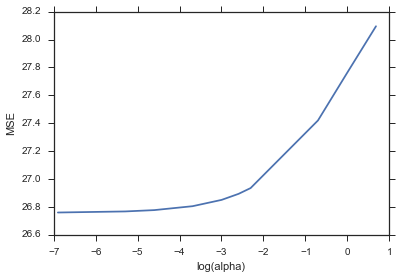

In [13]:
np.random.seed(88)
MSE = []
alphas = [0.001, 0.005, 0.01,0.025, 0.05, 0.075, 0.1, 0.5, 1, 2]
best_score = 100
best_lm = linear_model.Ridge()

for a in alphas:
    lm = linear_model.Ridge(alpha = a)
    lm.fit(X_train, y_train)
    # predict on validation set
    y_hat = lm.predict(X_valid)
    score = mean_squared_error(y_valid, y_hat)
    if score < best_score:
        best_lm = lm
        best_score = score
        print("score : %s best score %s"% (score, best_score))
        print(best_lm)
    MSE.append( mean_squared_error(y_valid, y_hat) )

plt.plot(np.log(alphas), MSE)
plt.xlabel('log(alpha)')
plt.ylabel('MSE')

print('----\n Best Score: %s'% best_score)
print('Model:')
print(best_lm)
print(MSE)